In [1]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
import re
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/16-Projects/zuel/data/2001_all_materials.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4783 entries, 0 to 4782
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   matnr                       4783 non-null   int64  
 1   zzprncode                   4782 non-null   float64
 2   zzibrnd                     4769 non-null   object 
 3   mtart                       4783 non-null   object 
 4   matkl                       4783 non-null   object 
 5   TherapeuticClass            4783 non-null   object 
 6   PrincipalName               4782 non-null   object 
 7   mstae                       4775 non-null   object 
 8   mstde                       4783 non-null   int64  
 9   mstav                       4762 non-null   object 
 10  mstdv                       4783 non-null   int64  
 11  zzdwrx                      4783 non-null   object 
 12  spart                       4783 non-null   int64  
 13  vtweg                       4783 

In [45]:
df['Description'] = df['Description'].astype(str)
test = df[df['Description'].str.startswith('DE')]
test = test.reset_index()
test

,index,matnr,zzprncode,zzibrnd,mtart,matkl,TherapeuticClass,PrincipalName,mstae,mstde,...,idnlf,prat1,prat2,prat3,prat4,prat5,prat6,prat7,prat8,prat9
0,0,21047156,101276.0,DERMAVEEN SOAP FREE,ZF01,ZCS,All other non-therapeutic products,INOVA PHARMACEUTICALS (S) PTE,LR,20250101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46,21039752,101254.0,DETTOL SG 250ML ORIG,ZF01,ZPC,Antiseptics and disinfectants,RECKITT BENCKISER (MALAYSIA),LR,20250101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47,23063844,101363.0,DERMACEUTIC SPOT PEE,ZF03,ZCS,"Emollients, protectives",PARVUS SDN BHD,LR,20250101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,122,21040367,101296.0,DEPO PROVERA INJ,ZF01,ZPE,"Other hormonal contraceptives, systemic",PFIZER (M) SDN BHD (PCL a/c),LR,20250101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,168,21039713,101254.0,DETTOL BS ORIGINAL,ZF01,ZPC,Antiseptics and disinfectants,RECKITT BENCKISER (MALAYSIA),LR,20250101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,4755,21039014,101254.0,DETTOL LIQUID (NUTAN,ZF01,ZPE,Antiseptics and disinfectants,RECKITT BENCKISER (MALAYSIA),LR,20250101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,4756,21039016,101254.0,DETTOL LIQUID (NUTAN,ZF01,ZPE,Antiseptics and disinfectants,RECKITT BENCKISER (MALAYSIA),LR,20250101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,4757,21039736,101254.0,DETTOL BS NOURISHING,ZF01,ZPC,Antiseptics and disinfectants,RECKITT BENCKISER (MALAYSIA),LR,20250101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,4758,21038903,101254.0,DETTOL TALCUM MENTHO,ZF01,ZPC,Antiseptics and disinfectants,RECKITT BENCKISER (MALAYSIA),LR,20250101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
print(test['Description'])
print(len(test['Description']))

0            DERMAVEEN SOAP FREEWASH500ML
1        DETTOL SG 250ML ORIGINAL (CORAL)
2        DERMACEUTIC SPOT PEEL CREAM 15ML
3          DEPO PROVERA INJVIAL150MG1X3ML
4                DETTOL BS ORIGINAL120GX3
                      ...                
112            DETTOL LIQUID (NUTAN) 50ML
113           DETTOL LIQUID (NUTAN) 250ML
114           DETTOL BS NOURISHING120G3+1
115        DETTOL TALCUM MENTHOL(NEW)150G
116    DETTOL SHOWER GEL NOURUSHING 625ML
Name: Description, Length: 117, dtype: object
117


In [47]:
word_tokenize(test['Description'][0])

['DERMAVEEN', 'SOAP', 'FREEWASH500ML']

In [48]:
thisdict = dict(name = "John", age = 36, country = "Norway")
if 'name' not in thisdict:
    print('name exist')
else:
    print('name do not exist')

name do not exist


In [109]:
# word 2 index
nltk_stop_words = stopwords.words ('english')
tokenizer = RegexpTokenizer(r'\w+')
doc2index = {}

def word2index(corpus):
    idx = 0
    w2i = {}
    all_docs_as_int = []
    j = 0
    for doc in corpus:
        doc_as_int = []
        wordsindoc = tokenizer.tokenize(doc.lower())
        doc2index[doc] = j
        j += 1
        for word in wordsindoc:
            if word not in nltk_stop_words:
                # check if this word exist in dictionary
                if word not in w2i:
                    w2i[word] = idx # dettol as 0
                    idx += 1

                doc_as_int.append(w2i[word])
                
        all_docs_as_int.append(doc_as_int)
    return w2i,all_docs_as_int

def index2word(w2i):
    i2w = []
    for k,v in w2i.items():
        i2w.append(k)
    return i2w

In [110]:
test_data = []
test_data.append(test['Description'][114])
test_data.append(test['Description'][115])

print('test_data\n',test_data)
w2i,docs_as_int = word2index(test_data)
i2w = index2word(w2i)
print('word 2 index\n', w2i)
print('docs as int\n',docs_as_int)
print('length of w2i = ', len(w2i))
print('length of doc = ', len(docs_as_int))
print('index2word\n',i2w)
print('doc2index\n',doc2index)

test_data
 ['DETTOL BS NOURISHING120G3+1', 'DETTOL TALCUM MENTHOL(NEW)150G']
word 2 index
 {'dettol': 0, 'bs': 1, 'nourishing120g3': 2, '1': 3, 'talcum': 4, 'menthol': 5, 'new': 6, '150g': 7}
docs as int
 [[0, 1, 2, 3], [0, 4, 5, 6, 7]]
length of w2i =  8
length of doc =  2
index2word
 ['dettol', 'bs', 'nourishing120g3', '1', 'talcum', 'menthol', 'new', '150g']
doc2index
 {'DETTOL BS NOURISHING120G3+1': 0, 'DETTOL TALCUM MENTHOL(NEW)150G': 1}


In [111]:
# measure term frequency

# length of term frequency = No Of Documents * No Of Words = 205 * 117
ROWS =    len(docs_as_int) # size of document
COLUMNS = len(w2i)         # size of words
size = ROWS * COLUMNS
print('size of term frequency matrix',size)
term_frequency = np.zeros((ROWS,COLUMNS))
print('shape of term frequence matrix', term_frequency.shape)
def count_vectorizor(doc_as_int):
    for i, doc in enumerate(doc_as_int):
        for j in doc:
            term_frequency[i][j] += 1
count_vectorizor(docs_as_int)
print('term_frequency\n',term_frequency)
print('note term dettol appears in both documents')

size of term frequency matrix 16
shape of term frequence matrix (2, 8)
term_frequency
 [[1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1. 1. 1.]]
note term dettol appears in both documents


In [112]:
# measure inverse document frequency
# idf = log(N/document_frequency)
document_frequency = np.sum(term_frequency>0,axis=0)
print('word appearnce frequency\n',document_frequency)
print('not dettol term appeared in both the test documents at index 0')
idf = np.log(len(docs_as_int)/document_frequency)
print('idf\n',idf)
print('since word dettol appeared in both documents at index 0, its importance for both docs is 0')

word appearnce frequency
 [2 1 1 1 1 1 1 1]
not dettol term appeared in both the test documents at index 0
idf
 [0.         0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
 0.69314718 0.69314718]
since word dettol appeared in both documents at index 0, its importance for both docs is 0


In [113]:
# measure tfidf
tfidf = term_frequency * idf
print('tfidf\n',tfidf)

tfidf
 [[0.         0.69314718 0.69314718 0.69314718 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.69314718 0.69314718
  0.69314718 0.69314718]]


In [114]:
from scipy import sparse
sA = sparse.csr_matrix(tfidf)
print(sA.shape)
print(type(sA))

(2, 8)
<class 'scipy.sparse.csr.csr_matrix'>


In [123]:
idx = doc2index['DETTOL TALCUM MENTHOL(NEW)150G']
query = sA[idx]
query

<1x8 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [128]:
scores = cosine_similarity(query,sA)
scores = scores.flatten()
print(scores.shape)
print(sA.shape)
print(scores)
(-scores).argsort()

(2,)
(2, 8)
[0. 1.]


array([1, 0], dtype=int64)

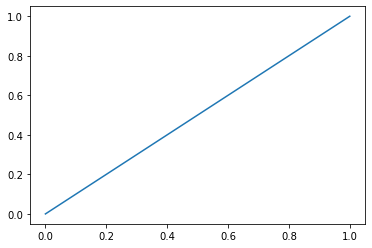

In [125]:
plt.plot(scores);

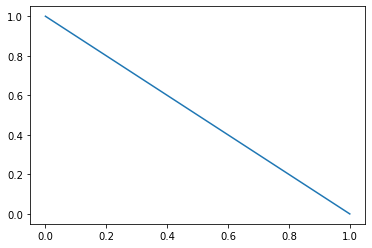

In [119]:
plt.plot(scores[(-scores).argsort()])

In [127]:
recommendation = (-scores).argsort()[0:2]
print(recommendation)
test['Description'].iloc[recommendation]

[1 0]


1    DETTOL SG 250ML ORIGINAL (CORAL)
0        DERMAVEEN SOAP FREEWASH500ML
Name: Description, dtype: object

In [71]:
# across all data set
test_data = test['Description'][:]

print('test_data\n',test_data)
w2i,docs_as_int = word2index(test_data)
i2w = index2word(w2i)
print('word 2 index\n', w2i)
print('docs as int\n',docs_as_int)
print('length of w2i = ', len(w2i))
print('length of doc = ', len(docs_as_int))
print('index2word\n',i2w)
print('doc2index\n',doc2index)

# measure term frequency

# length of term frequency = No Of Documents * No Of Words = 205 * 117
ROWS =    len(docs_as_int) # size of document
COLUMNS = len(w2i)         # size of words
size = ROWS * COLUMNS
print('size of term frequency matrix',size)
term_frequency = np.zeros((ROWS,COLUMNS))
print('shape of term frequence matrix', term_frequency.shape)
def count_vectorizor(doc_as_int):
    for i, doc in enumerate(doc_as_int):
        for j in doc:
            term_frequency[i][j] += 1
count_vectorizor(docs_as_int)

document_frequency = np.sum(term_frequency>0,axis=0)
print(document_frequency)
idf = np.log(len(docs_as_int)/document_frequency)
# measure tfidf
tfidf = term_frequency * idf
print('tfidf\n',tfidf)

test_data
 0            DERMAVEEN SOAP FREEWASH500ML
1        DETTOL SG 250ML ORIGINAL (CORAL)
2        DERMACEUTIC SPOT PEEL CREAM 15ML
3          DEPO PROVERA INJVIAL150MG1X3ML
4                DETTOL BS ORIGINAL120GX3
                      ...                
112            DETTOL LIQUID (NUTAN) 50ML
113           DETTOL LIQUID (NUTAN) 250ML
114           DETTOL BS NOURISHING120G3+1
115        DETTOL TALCUM MENTHOL(NEW)150G
116    DETTOL SHOWER GEL NOURUSHING 625ML
Name: Description, Length: 117, dtype: object
word 2 index
 {'dermaveen': 0, 'soap': 1, 'freewash500ml': 2, 'dettol': 3, 'sg': 4, '250ml': 5, 'original': 6, 'coral': 7, 'dermaceutic': 8, 'spot': 9, 'peel': 10, 'cream': 11, '15ml': 12, 'depo': 13, 'provera': 14, 'injvial150mg1x3ml': 15, 'bs': 16, 'original120gx3': 17, 'dermadrate': 18, 'dry': 19, 'skintreatment': 20, '50g': 21, 'hand': 22, 'sanitiser': 23, '50ml': 24, 'refresh': 25, '950ml': 26, 'reenergize': 27, 'spray': 28, '450mlm': 29, 'dew': 30, 'freewash250ml': 31, '

In [56]:
for w in i2w:
    if w.startswith('de'):
        print(w)

dermaveen
dettol
dermaceutic
depo
dermadrate
dew
dermovatecream100gm
dextrose
dermovatecream15gm
deep
dermareen
dermatix
detol
debtin
dermovateoint100gm
desferalvial500mg10
dermovateoint15gm


In [72]:
test_data

0            DERMAVEEN SOAP FREEWASH500ML
1        DETTOL SG 250ML ORIGINAL (CORAL)
2        DERMACEUTIC SPOT PEEL CREAM 15ML
3          DEPO PROVERA INJVIAL150MG1X3ML
4                DETTOL BS ORIGINAL120GX3
                      ...                
112            DETTOL LIQUID (NUTAN) 50ML
113           DETTOL LIQUID (NUTAN) 250ML
114           DETTOL BS NOURISHING120G3+1
115        DETTOL TALCUM MENTHOL(NEW)150G
116    DETTOL SHOWER GEL NOURUSHING 625ML
Name: Description, Length: 117, dtype: object

In [73]:
#docindex = pd.Series(test.index,index=test['Description'])
#idx = docindex['DETTOL SG 250ML ORIGINAL (CORAL)']
idx = doc2index['DETTOL SG 250ML ORIGINAL (CORAL)']

print(idx)
print(doc2index)

1
{'DETTOL SG 250ML ORIGINAL (CORAL)': 1, 'DETTOL TALCUM MENTHOL(NEW)150G': 115, 'DERMAVEEN SOAP FREEWASH500ML': 0, 'DERMACEUTIC SPOT PEEL CREAM 15ML': 2, 'DEPO PROVERA INJVIAL150MG1X3ML': 3, 'DETTOL BS ORIGINAL120GX3': 4, 'DERMADRATE DRY SKINTREATMENT CREAM 50G': 5, 'DETTOL HAND SANITISER 50ML REFRESH': 6, 'DETTOL SG 950ML REENERGIZE(CORAL)': 7, 'DETTOL D/SPRAY 450MLM.DEW': 8, 'DERMAVEEN SOAP FREEWASH250ML': 9, 'DETTOL LIQUID (NUTAN) 5LTR': 10, 'DETTOL ANTISEPTIC WOUND WASH SPRAY 50ML': 11, 'DETTOL CREAM 30G': 12, 'DETTOL HANDWASH 225ML POUCH TP ORIGINAL': 13, 'DERMAVEEN MOISTURISING LOTION 500ML': 14, "DETTOL ANTIBACTERIALWIPES10'S": 15, 'DETTOL HAND SANITISER 50MLORIGINAL': 16, 'DETTOL HANDWASH500MLSKINCARE': 17, 'DETTOL SG 950ML/550ML ORIGINAL (CORAL)': 18, 'DERMACEUTIC SPOT CREAM 30ML': 19, 'DETTOL BS 120G 3+1SKINCARE(CORAL)': 20, 'DETTOL LIQUID (NUTAN) 500ML': 21, 'DETTOL HANDWASH POUCH 225ML SKINCARE': 22, 'DETTOL BS 120G 3+1FRESH(CORAL)': 23, 'DERMOVATECREAM100GM': 24, 'DETTOL 

In [74]:

idx = doc2index['DETTOL LIQUID (NUTAN) 50ML']

print(idx)
print(doc2index)

112
{'DETTOL SG 250ML ORIGINAL (CORAL)': 1, 'DETTOL TALCUM MENTHOL(NEW)150G': 115, 'DERMAVEEN SOAP FREEWASH500ML': 0, 'DERMACEUTIC SPOT PEEL CREAM 15ML': 2, 'DEPO PROVERA INJVIAL150MG1X3ML': 3, 'DETTOL BS ORIGINAL120GX3': 4, 'DERMADRATE DRY SKINTREATMENT CREAM 50G': 5, 'DETTOL HAND SANITISER 50ML REFRESH': 6, 'DETTOL SG 950ML REENERGIZE(CORAL)': 7, 'DETTOL D/SPRAY 450MLM.DEW': 8, 'DERMAVEEN SOAP FREEWASH250ML': 9, 'DETTOL LIQUID (NUTAN) 5LTR': 10, 'DETTOL ANTISEPTIC WOUND WASH SPRAY 50ML': 11, 'DETTOL CREAM 30G': 12, 'DETTOL HANDWASH 225ML POUCH TP ORIGINAL': 13, 'DERMAVEEN MOISTURISING LOTION 500ML': 14, "DETTOL ANTIBACTERIALWIPES10'S": 15, 'DETTOL HAND SANITISER 50MLORIGINAL': 16, 'DETTOL HANDWASH500MLSKINCARE': 17, 'DETTOL SG 950ML/550ML ORIGINAL (CORAL)': 18, 'DERMACEUTIC SPOT CREAM 30ML': 19, 'DETTOL BS 120G 3+1SKINCARE(CORAL)': 20, 'DETTOL LIQUID (NUTAN) 500ML': 21, 'DETTOL HANDWASH POUCH 225ML SKINCARE': 22, 'DETTOL BS 120G 3+1FRESH(CORAL)': 23, 'DERMOVATECREAM100GM': 24, 'DETTO

In [75]:
print(tfidf.shape)
print(type(tfidf))

(117, 202)
<class 'numpy.ndarray'>


In [76]:
from scipy import sparse
sA = sparse.csr_matrix(tfidf)
print(sA.shape)
print(type(sA))

(117, 202)
<class 'scipy.sparse.csr.csr_matrix'>


In [78]:
query = sA[idx]
query

<1x202 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [79]:
scores = cosine_similarity(query,sA)
scores = scores.flatten()
print(scores.shape)
print(sA.shape)

(117,)
(117, 202)


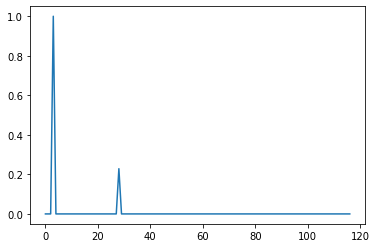

In [34]:
plt.plot(scores);

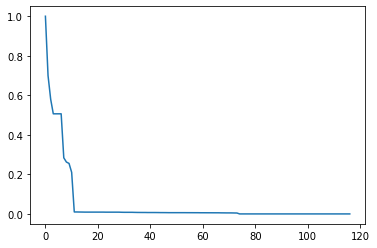

In [80]:
plt.plot(scores[(-scores).argsort()])

In [81]:
recommendation = (-scores).argsort()[0:6]
print(recommendation)
df['Description'].iloc[recommendation]

[112 113  21  76  33  79]


112                                    nan
113                                    nan
21     URIAGE L'EAU DEMAQUILLANTEPNM 250ML
76                                     nan
33         TECNIS TORIC 1-PIECECYL3.0026.5
79                                     nan
Name: Description, dtype: object

In [24]:
test_data

0             DERMAVEEN SOAP FREEWASH500ML
46        DETTOL SG 250ML ORIGINAL (CORAL)
47        DERMACEUTIC SPOT PEEL CREAM 15ML
122         DEPO PROVERA INJVIAL150MG1X3ML
168               DETTOL BS ORIGINAL120GX3
                       ...                
4755            DETTOL LIQUID (NUTAN) 50ML
4756           DETTOL LIQUID (NUTAN) 250ML
4757           DETTOL BS NOURISHING120G3+1
4758        DETTOL TALCUM MENTHOL(NEW)150G
4759    DETTOL SHOWER GEL NOURUSHING 625ML
Name: Description, Length: 117, dtype: object

In [82]:
def recommend_movies(title):
    # find the idx of the movie
    idx = doc2index[title]
    query = sA[idx]
    scores = cosine_similarity(query,sA)
    scores = scores.flatten()
    recommendation = (-scores).argsort()[0:6]
    return df['Description'].iloc[recommendation]

In [83]:
recommend_movies('DETTOL SG 250ML ORIGINAL (CORAL)')

1                   KENHANCER PLASTER20'S
49    CETAPHIL MOIST LOTION TWINPACK200ML
18            UX II SEARCH -SED ST29MLX 1
96                                    nan
55                    EDURANTTABS25MG30'S
53    DUPRO FOLLOW-UP FORMULA STEP 21.6KG
Name: Description, dtype: object

In [84]:
recommend_movies('DETTOL LIQUID (NUTAN) 50ML')

112                                    nan
113                                    nan
21     URIAGE L'EAU DEMAQUILLANTEPNM 250ML
76                                     nan
33         TECNIS TORIC 1-PIECECYL3.0026.5
79                                     nan
Name: Description, dtype: object

In [85]:
recommend_movies('DETTOL LIQUID (NUTAN) 50ML')

112                                    nan
113                                    nan
21     URIAGE L'EAU DEMAQUILLANTEPNM 250ML
76                                     nan
33         TECNIS TORIC 1-PIECECYL3.0026.5
79                                     nan
Name: Description, dtype: object

In [ ]:
sA[122]